# Identificación de sistemas mediante Redes Neuronales usando Tensorflow y Keras
## Péndulo simple actuado
### Señal de prueba

Se emplea una señal inventada $u(t)$ que abarca diversas frecuencias para probar los diferentes modos del sistema.
$$U=0.029\sin(4ft\pi)-0.053\cos(6ft\pi)+0.03\sin(8ft\pi)-0.017\cos(10ft\pi)+0.0027\sin(12ft\pi)+0.0083*\cos(14ft\pi)+0.015\sin(16ft\pi)$$

### Señal de verificación
Se emplea otra señal inventada $v(t)$ que abarca diversas frecuencias para probar los diferentes modos del sistema.
$$V=-0.023\sin(2ft\pi)+0.027\cos(4ft\pi)-0.013\sin(6ft\pi)-0.015\cos(8ft\pi)+0.003\sin(10ft\pi)-0.007\cos(12ft\pi)+0.023\sin(14ft\pi)$$

### Método de Euler
$m=0.2 kg$, $b=0.72\frac{kg}{m\cdot s}$, $g=9.8\frac{m}{s^{2}}$, $L=0.5m$.
Tiempo de simulación: $5s$.
Número de muestras: $1000$.
$x_{1}$ y $x_{2}$ representan los dos estados del sistema. Posición y velocidad, respectivamente.

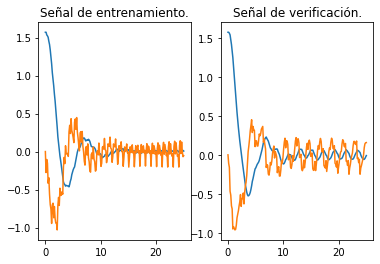

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m=0.2 #kg
b=0.72 #kg/(m*s)
g=9.8 #m/s²
l=0.5 #m
f=100 #Hz

ti=0 #Tiempo de inicio
tf=25 #Tiempo de simulación
n=200 #Número de muestras
h=(tf-ti)/n
t=np.linspace(ti, tf, n)
x1=np.zeros(n)
x2=np.zeros(n)
X1=np.zeros(n)
X2=np.zeros(n)
u=0.029*np.sin(2*np.pi*f*t*2)-0.053*np.cos(2*np.pi*t*3)+0.03*np.sin(2*np.pi*f*t*4)-0.017*np.cos(2*np.pi*t*5)+0.0027*np.sin(2*np.pi*f*t*6)+0.0083*np.cos(2*np.pi*t*7)+0.015*np.sin(2*np.pi*f*t*8)
v=-0.023*np.sin(2*np.pi*f*t)+0.027*np.cos(2*np.pi*t*2)-0.013*np.sin(2*np.pi*f*t*3)-0.015*np.cos(2*np.pi*t*4)+0.003*np.sin(2*np.pi*f*t*5)-0.007*np.cos(2*np.pi*t*6)+0.023*np.sin(2*np.pi*f*t*7)
xp1=np.zeros(n)
xp2=np.zeros(n)
Xp1=np.zeros(n)
Xp2=np.zeros(n)
x1[0], x2[0], X1[0], x2[0]=np.pi/2, 0.0, np.pi/2, 0.0
#print(U)
for k in range(n-1):
  x1[k+1]=x1[k]+h*x2[k]
  x2[k+1]=x2[k]+h*((1/(m*l**2))*u[k]-m*g*l*np.sin(x1[k])-b*x2[k])
  X1[k+1]=X1[k]+h*X2[k]
  X2[k+1]=X2[k]+h*((1/(m*l**2))*v[k]-m*g*l*np.sin(X1[k])-b*X2[k])
  xp1[k]=x1[k]
  xp2[k]=x2[k]
  Xp1[k]=X1[k]
  Xp2[k]=X2[k]

ax1=plt.subplot(121)
ax1.plot(t, x1, t, x2)
ax1.set_title("Señal de entrenamiento.")
ax2=plt.subplot(122)
ax2.plot(t, X1, t, X2)
ax2.set_title("Señal de verificación.")
plt.show()

### Estados anteriores
Se calculan los valores para $x_{1}(k-1)$, de $x_{2}(k-1)$ y de $u_{1}(k-1)$.

In [4]:
#X1, X2, U
xx1=np.zeros(n)
xx2=np.zeros(n)
XX1=np.zeros(n)
XX2=np.zeros(n)
U=np.zeros(n)
V=np.zeros(n)
xx1[0]=0
xx2[0]=0
XX1[0]=0
XX2[0]=0
U[0]=0
V[0]=0
xx1[1:200]=x1[0:len(x1)-1]
xx2[1:200]=x2[0:len(x2)-1]
XX1[1:200]=X1[0:len(X1)-1]
XX2[1:200]=X2[0:len(X2)-1]
U[1:200]=u[0:len(u)-1]
V[1:200]=v[0:len(v)-1]
X=np.append([[u]], [[U], [x1], [xx1], [x2], [xx2]], axis=0)
Y=np.append([[xp1]], [[xp2]], axis=0)
XX=np.append([[v]], [[V], [X1], [XX1], [X2], [XX2]], axis=0)
YY=np.append([[Xp1]], [[Xp2]], axis=0)
num=len(x1)
X=np.reshape(X, (num, 6))
Y=np.reshape(Y, (num, 2))
XX=np.reshape(XX, (num, 6))
YY=np.reshape(YY, (num, 2))

### Red neuronal
# Se establecen los parámetros de la red neuronal. Seis neuronas en la capa de entrada, diez neuronas en la capa intermedia y dos neuronas en la capa de salida.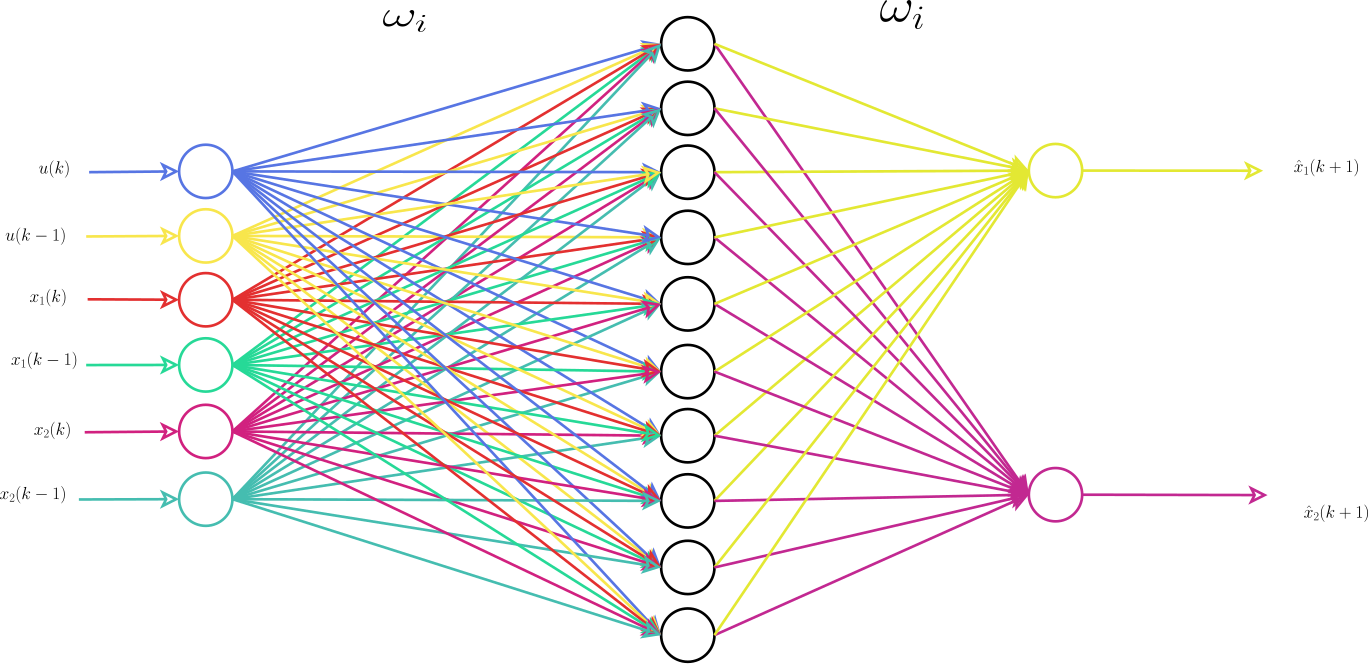


In [14]:
import tensorflow as tf
from tensorflow import keras

x=tf.keras.Input(shape=(6, ))
inter=keras.layers.Dense(10,  activation="sigmoid", name="intermedia")(x)
salida=keras.layers.Dense(2, activation="linear", name="salida")(inter)
modelo=keras.Model(inputs=x, outputs=salida)
modelo.compile(loss="mean_squared_error", optimizer="Adam")
modelo.fit(X, Y, epochs=100, batch_size=10, verbose=0)
m=keras.metrics.Accuracy()
m.update_state([[1], [2], [3], [4]], [[0], [2], [3], [4]])
m.result().numpy()

0.75

In [12]:
modelo.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
intermedia (Dense)           (None, 10)                70        
_________________________________________________________________
salida (Dense)               (None, 2)                 22        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


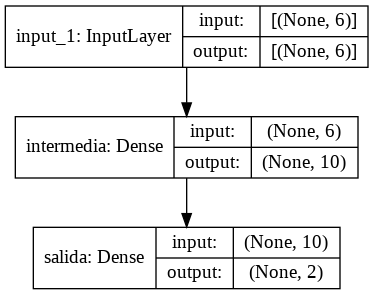

In [10]:
keras.utils.plot_model(modelo, 'Modelo_2.png', show_shapes=True)

In [9]:
#Pesos de entrenamiento
print(modelo.trainable_variables)

[<tf.Variable 'intermedia/kernel:0' shape=(6, 10) dtype=float32, numpy=
array([[ 0.05386589, -0.09768237, -0.35968757, -0.03501925, -0.04540109,
         0.28082356, -0.578719  , -0.2250773 ,  0.30656236, -0.2653877 ],
       [-0.4493382 ,  0.03791938,  0.14502431,  0.04480143, -0.22717637,
        -0.17906496,  0.49860218,  0.4339995 , -0.4246035 , -0.12401943],
       [-0.10378485,  0.30479458, -0.26345018, -0.23965082,  0.26768535,
         0.3582393 , -0.01706908, -0.15374023,  0.27547348, -0.48539913],
       [ 0.46265438,  0.59152114,  0.6462256 , -0.44160563,  0.74622756,
        -0.365782  ,  0.3349474 , -0.09975205, -0.5592426 , -0.51835793],
       [-0.01697929, -0.4976561 ,  0.1792942 ,  0.01115191,  0.6205717 ,
         0.25291404,  0.2704052 ,  0.28520626, -0.3040334 , -0.4989587 ],
       [ 0.425773  ,  0.55962855,  0.06153963, -0.05531255, -0.2523963 ,
        -0.42732593, -0.6183612 , -0.64849335,  0.0189496 , -0.91867363]],
      dtype=float32)>, <tf.Variable 'intermed

Comprobación con la señal de entrenamiento.

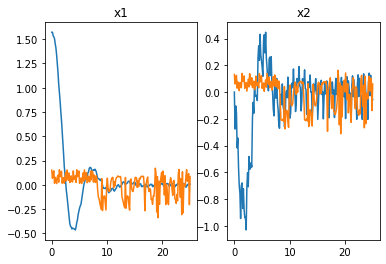

In [ ]:
predic=modelo.predict(X)
ax1=plt.subplot(121)
ax1.plot(t, x1, t, predic[:, 0])
ax1.set_title("x1")
ax2=plt.subplot(122)
plt.plot(t, x2, t, predic[:, 1])
ax2.set_title("x2")
plt.show()

Comprobación con la señal de verificación.

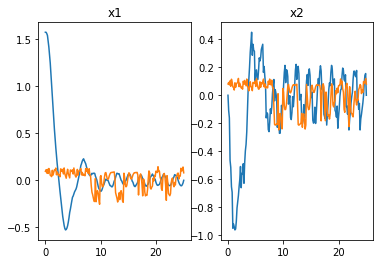

In [ ]:
predic=modelo.predict(XX)
ax1=plt.subplot(121)
ax1.plot(t, Xp1, t, predic[:, 0])
ax1.set_title("x1")
ax2=plt.subplot(122)
plt.plot(t, Xp2, t, predic[:, 1])
ax2.set_title("x2")
plt.show()
#print(predic[:,1])